# 1 - Data Importation & Processing


In [239]:
import os # os is a library that helps load and write files
import pdb # pdb is a helpful debugging library
import numpy as np # used for defining arrays
import matplotlib.pyplot as plt # plt is a frequently used plotting function

# from scipy.stats import skew, kurtosis
from sklearn import preprocessing, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cur_dir = os.getcwd()
proj_dir = cur_dir #change to path on your computer
data_dir = proj_dir + "/books/"

In [260]:
os.chdir(proj_dir)
datapath = "books/"
author_files = os.listdir(proj_dir)
author_files = sorted(author_files)
author_files = author_files[1:]
print(author_files)

['F-ALittlePrincess.txt', 'F-AgeOfInnocence.txt', 'F-AgnesGrey.txt', 'F-BlackBeauty.txt', 'F-Cranford.txt', 'F-Frankenstein.txt', 'F-HouseOfMirth.txt', 'F-JaneEyre.txt', 'F-LadyAudleysSecret.txt', 'F-LittleWomen.txt', 'F-MansfieldPark.txt', 'F-Middlemarch.txt', 'F-NorthAndSouth.txt', 'F-NorthangerAbbey.txt', 'F-Persuasion.txt', 'F-PrideAndPrejudice.txt', 'F-Sanditon.txt', 'F-SenseAndSensibility.txt', 'F-TestingALadysLife.txt', 'F-TestingAnneOfGreenGables.txt', 'F-TestingBelinda.txt', 'F-TestingBondwoman.txt', 'F-TestingCamilla.txt', 'F-TestingCurseCaste.txt', 'F-TestingDalloway.txt', 'F-TestingDanielDeronda.txt', 'F-TestingEmma.txt', 'F-TestingIncidents.txt', 'F-TestingIola.txt', 'F-TestingLighthouse.txt', 'F-TestingMaryBarton.txt', 'F-TestingOurNig.txt', 'F-TestingSecretGarden.txt', 'F-TestingSilasMarner.txt', 'F-TestingTheCustomOfTheCountry.txt', 'F-TestingUncleTom.txt', 'F-TestingYellowWallpaper.txt', 'F-TheAwakening.txt', 'F-TheMillOnTheFloss.txt', 'F-ThePerpetualCurate.txt', 'F-Th

In [261]:
NUM_CISWOMEN_TRAIN = 25
NUM_CISMEN_TRAIN = 25
NUM_TRAIN = NUM_CISWOMEN_TRAIN + NUM_CISMEN_TRAIN

NUM_CISWOMEN_TEST = 20
NUM_CISMEN_TEST = 20
NUM_TEST = NUM_CISWOMEN_TEST + NUM_CISMEN_TEST

NUM_CISWOMEN = NUM_CISWOMEN_TRAIN + NUM_CISWOMEN_TEST
NUM_CISMEN = NUM_CISMEN_TRAIN + NUM_CISMEN_TEST

NUM_TOTAL = NUM_CISWOMEN + NUM_CISMEN

NUM_TRAINING_EXAMPLES = NUM_CISWOMEN_TRAIN + NUM_CISMEN_TRAIN 

In [262]:
def get_gender(filename):
    if filename[0] == 'F':
        return 1
    elif filename[0] == 'M':
        return 0

# 2 - Train Classifier

Train a neural net with X and Y 

For first milestone, treat it as a binary classification problem. A cisWoman is the positive class, and every other gender identity is the negative class

In [267]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def return_embeddings(list_of_files, n, n_cis_w, n_cis_m):
    
    # get embeddings
    
    # os.chdir(data_dir) # change path to import from correct dir
    array_of_text = []
    Y_cisWomen = np.zeros((n, 1))
    i = 0
    
    for author_filename in list_of_files:
        Y[i] = get_gender(author_filename)
        with open (author_filename, 'r') as file:
            all_txt = file.read()
            array_of_text.append(all_txt)

    count_vect = CountVectorizer()
    count_matrix = count_vect.fit_transform(array_of_text)
    array_of_feature_names = count_vect.get_feature_names_out()
    count_matrix = count_matrix.toarray()

# create a gender identity specific dictionaries 
# key = eg. Austen.txt (str)
# vale = [0 0 0 ... 2 3 0] (list of integers)
# should looop over the entirety of the list_of_author_files

    # **NOTE: These are very sparse vectors

    # create X matrix and Y vector for ML
        
    n = NUM_TOTAL
    Y_cisWomen = np.zeros((n, 1))
    Y_cisMen = np.zeros((n, 1))
        
    for j in range(NUM_CISWOMEN): # cisWomen as the positive class 
        Y_cisWomen[j] = 1;
        
    for j in range(NUM_CISWOMEN, NUM_CISWOMEN + NUM_CISMEN):
        Y_cisMen[j] = 1;
    
    return count_matrix, Y_cisWomen, array_of_feature_names

In [268]:
(X, Y, array_of_feat_names) = return_embeddings(author_files, NUM_TOTAL, NUM_CISWOMEN, NUM_CISMEN)
print(X.shape)
print(Y.shape)
print(len(array_of_feat_names))
os.chdir(proj_dir) #change dir back to project directory after data imported

print(X)
print(array_of_feature_names)

(90, 7994)
(90, 1)
7994
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['10' '15' '1500' ... 'youthful' 'zampa' 'éclat']


In [269]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(z):
    return 1 / (1 + np.exp(-z))

def dfdz(z):
    return f(z) * (1 - f(z))

def J(y, yhat):
    eps = 1e-8
    return -(yhat * np.log(y+eps) + (1-yhat) * np.log(1-y+eps))

def dJdy(y, yhat):
    eps = 1e-8
    return (1-yhat)/(1-y+eps) - yhat/(y+eps)

def forward(x, w):
    return f(np.dot(x, w))

## Option one: use the given derivatives (clearer)
def backward1(x, w, y, yhat):
    z = np.dot(x, w)
    dzdw = x
    return dJdy(y, yhat) * dfdz(z) * dzdw

## Option two: use the explicit calculted form (faster)
def backward2(x, y, yhat):  # w not needed for this form
    return ( y*(1-yhat) - yhat*(1-y) ) * x

def update(w, alpha, step):
    return w - alpha * step

def train(X, yhat, n_epoch, alpha):
    X_withbias = np.hstack([np.ones((X.shape[0],1)), X])  # fix x_0 = 1
    
    # keep track of performance during training
    costs = np.zeros(shape=(n_epoch,))

    # random nonzero initialization
    w = np.random.normal(0, 0.01, size=(X.shape[1]+1,))  # +1 for the bias

    for epoch in range(n_epoch):
        for i, x in enumerate(X_withbias):
            y = forward(x, w)  # prediction for one sample
            step = backward2(x, y, yhat[i])  # step to take, yhat[i] to just get this sample
            w = update(w, alpha, step)  # update weights
        
        # ### Some niceness to see our progress
        # Calculate total cost after epoch
        predictions = forward(X_withbias, w)  # predictions for entire set
        costs[epoch] = np.mean(J(predictions, yhat))  # mean cost per sample
        # report progress
        
        # accuracy = np.mean(predictions.round() == yhat)  # current accuracy on entire set
        # print('Training accuracy after epoch {}: {:.4%}'.format(epoch, accuracy))
        
        if ((epoch % 100) == 0) or (epoch == (n_epoch - 1)):
            accuracy = np.mean(predictions.round() == yhat)  # current accuracy on entire set
            print('Training accuracy after epoch {}: {:.4%}'.format(epoch, accuracy))
            # find some way to print each of the predictions (Type 1, Type 2 error)
            # can we visualize the data somehow?
            
    return w, costs


In [349]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


def neural_net():
    
    # Step 3: 
    #  - format labels to be an integer vector of 0s and 1s
    #  - normalize X_feat using StandardScaler 
    #  - (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    
    (X, Y, array_of_feat_names) = return_embeddings(author_files, NUM_TOTAL, NUM_CISWOMEN, NUM_CISMEN)
    
    # scaler = StandardScaler()
    # X_feat = scaler.fit_transform(X)
    y = Y.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    
    n_epoch = 500
    alpha = 0.0001
    
    w, costs = train(X_train, y_train, n_epoch, alpha)
    
    ######
    
    # Plot log-loss function across training examples
    
    epochs_list = []

    for j in range(n_epoch):
        epochs_list.append(j)

    x1 = epochs_list
    y1 = costs

    plt.plot(x1, y1, label = "Testing data")
    plt.xlabel("Number epoch")
    plt.ylabel("Log loss error")
    plt.title("Training log loss error over epochs for neural network")
    plt.legend()
    plt.show()
    
    #####
    
    # Print feature names of 3 most significant weights
    
    w_list = w.tolist()
    array_of_feature_names = array_of_feat_names.tolist()

    w1 = 0
    feature_name1 = ""
    w2 = 0
    feature_name2 = ""
    w3 = 0
    feature_name3 = ""
    
    for j in range(len(w_list) - 1):
        curr_w = w_list[j]
        curr_feature_name = array_of_feature_names[j]
        if (abs(curr_w) > w1 or abs(curr_w) > w2 or abs(curr_w) > w3):
            if (abs(curr_w) > w1):
                w1 = curr_w
                feature_name1 = curr_feature_name
                continue
            if (abs(curr_w) > w2):
                w2 = curr_w
                feature_name2 = curr_feature_name
                continue
            if (abs(curr_w) > w3):
                w3 = curr_w
                feature_name3 = curr_feature_name
    
    print("Three largest weights are", w1, w2, w3)
    print("Associated feature names are:", feature_name1, feature_name2, feature_name3)
    
    ########
    
    # Print weight values of other potentially significant/interesting features
    
    her_weight = 0
    she_weight = 0
    his_weight = 0
    he_weight = 0
    him_weight = 0
    I_weight = 0
    kindness_weight = 0
    home_weight = 0
    miss_weight = 0
    mr_weight = 0
    family_weight = 0
    father_weight = 0
    mother_weight = 0
    sister_weight = 0
    brother_weight = 0
    grandmother_weight = 0
    grandfather_weight = 0
    uncle_weight = 0
    aunt_weight = 0
    beautiful_weight = 0
    lovely_weight = 0
    
    for j in range(len(w) - 1):
        curr_w = w[j]
        curr_feature_name = array_of_feature_names[j]
        if (curr_feature_name == "her"):
            her_weight = curr_w
        if (curr_feature_name == "she"):
            she_weight = curr_w
        if (curr_feature_name == "his"):
            his_weight = curr_w
        if (curr_feature_name == "he"):
            he_weight = curr_w
        if (curr_feature_name == "him"):
            him_weight = curr_w
        if (curr_feature_name == "i"):
            I_weight = curr_w
        if (curr_feature_name == "kindness"):
            kindness_weight = curr_w
        if (curr_feature_name == "home"):
            home_weight = curr_w
        if (curr_feature_name == "miss"):
            miss_weight = curr_w
        if (curr_feature_name == "mr"):
            mr_weight = curr_w
        if (curr_feature_name == "family"):
            family_weight = curr_w
        if (curr_feature_name == "father"):
            father_weight = curr_w
        if (curr_feature_name == "mother"):
            mother_weight = curr_w
        if (curr_feature_name == "sister"):
            sister_weight = curr_w
        if (curr_feature_name == "brother"):
            brother_weight = curr_w
        if (curr_feature_name == "grandmother"):
            grandmother_weight = curr_w
        if (curr_feature_name == "grandfather"):
            grandfather_weight = curr_w
        if (curr_feature_name == "uncle"):
            uncle_weight = curr_w
        if (curr_feature_name == "aunt"):
            aunt_weight = curr_w
        if (curr_feature_name == "beautiful"):
            beautiful_weight = curr_w
    
    print("Weight associated with the word 'her':", her_weight)
    print("Weight associated with the word 'she':", she_weight)
    print("Weight associated with the word 'his':", his_weight)
    print("Weight associated with the word 'he':", he_weight)
    print("Weight associated with the word 'kindness':", kindness_weight)
    print("Weight associated with the word 'home':", home_weight)
    print("Weight associated with the word 'miss':", miss_weight)
    print("Weight associated with the word 'mr':", mr_weight)
    print("Weight associated with the word 'father':", father_weight)
    print("Weight associated with the word 'mother':", mother_weight)
    print("Weight associated with the word 'sister':", sister_weight)
    print("Weight associated with the word 'brother':", brother_weight)
    print("Weight associated with the word 'grandmother':", grandmother_weight)
    print("Weight associated with the word 'grandfather':", grandfather_weight)
    print("Weight associated with the word 'uncle':", uncle_weight)
    print("Weight associated with the word 'aunt':", aunt_weight)
    print("Weight associated with the word 'beautiful':", beautiful_weight)
    print("") # just for a visual break
    
    ######
    
    # Testing Protocol
    
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    total_women_test = 0
    total_men_test = 0

    mean_squared_error = 0
    mean_squared_errors = []
    m_values = []
    
    j = 0
    y_test = y_test.tolist()
    
    for row in X_test:
        
        X_withbias = np.hstack([1, row])
        
        # X_withbias = np.hstack([np.ones((new_embedding.shape[0],1)), new_embedding])  # fix x_0 = 1

        predictions = forward(X_withbias, w)
    
        if (predictions.round() == 1): # Prediction == female
            if (y_test[j] == 1):
                total_women_test += 1
                true_positives += 1
                mean_squared_errors.append((mean_squared_error / (j + 1)))
                m_values.append((j+1))
            else:
                total_men_test += 1
                false_positives += 1
                mean_squared_error += 1
                mean_squared_errors.append((mean_squared_error / (j + 1)))
                m_values.append((j+1))
    
        else: # Prediction == male
            if (y_test[j] == 1):
                total_women_test += 1
                false_negatives += 1
                mean_squared_error += 1
                mean_squared_errors.append((mean_squared_error / (j + 1)))
                m_values.append((j+1))
            else:
                total_men_test += 1
                true_negatives += 1
                mean_squared_errors.append((mean_squared_error / (j + 1)))
                m_values.append((j+1))
        j += 1
        
    # error metrics

    accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
    recall = (true_positives) / (true_positives + false_negatives)
    precision = (true_positives) / (true_positives + false_positives)
        
    print("True positives is", true_positives, "/", total_women_test)
    print("False positives is", false_positives, "/", total_men_test)
    print("True negatives is", true_negatives, "/", total_men_test)
    print("False negatives is", false_negatives, "/", total_women_test)
    print("Accuracy for testing data is", accuracy)
    print("Mean squared error is", (mean_squared_error / (total_women_test + total_men_test)))
    print("Recall is", recall)
    print("Precision is", precision)
    
    x1 = m_values
    y1 = mean_squared_errors
    
    plt.plot(x1, y1, label = "Testing data")
    plt.xlabel("Number training examples")
    plt.ylabel("Mean squared error")
    plt.title("One Layer NN MSE for Test Data")
    plt.legend()
    plt.show()
    
    #####
    
    

Training accuracy after epoch 0: 47.6190%
Training accuracy after epoch 100: 100.0000%
Training accuracy after epoch 200: 100.0000%
Training accuracy after epoch 300: 100.0000%
Training accuracy after epoch 400: 100.0000%
Training accuracy after epoch 499: 100.0000%


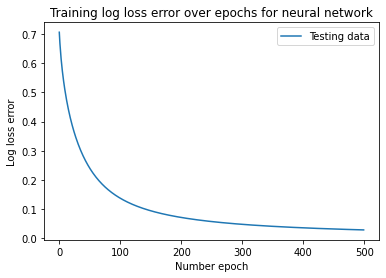

Three largest weights are 0.18911265577098033 0.09567966876892903 0.07682085010673541
Associated feature names are: withdraw shed whichever
Weight associated with the word 'her': 0.02081731574928395
Weight associated with the word 'she': 0.00858729597059559
Weight associated with the word 'his': 0.020698750020154647
Weight associated with the word 'he': 0.013445944797702144
Weight associated with the word 'kindness': 0.0070698612981041535
Weight associated with the word 'home': -0.0030426888033843334
Weight associated with the word 'miss': 0.00966982139563228
Weight associated with the word 'mr': -0.006570214067564325
Weight associated with the word 'father': -0.0057783158033366845
Weight associated with the word 'mother': 0.029940824458410845
Weight associated with the word 'sister': -0.004049231679935652
Weight associated with the word 'brother': 0.0032034139264702543
Weight associated with the word 'grandmother': 0.0007816908645820839
Weight associated with the word 'grandfather': 0

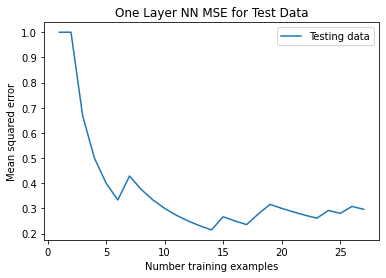

In [350]:
neural_net()

# Old Version Of Code

In [306]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def old_return_embeddings():
    
    # get embeddings

    array_of_text = []

    
    list_of_author_files = ["F-AgeOfInnocence.txt", "F-AgnesGrey.txt", "F-ALittlePrincess.txt", "F-BlackBeauty.txt", "F-Cranford.txt", "F-Frankenstein.txt", "F-HouseOfMirth.txt", "F-JaneEyre.txt", "F-LadyAudleysSecret.txt", "F-MansfieldPark.txt", "F-Middlemarch.txt", "F-NorthAndSouth.txt", "F-NorthangerAbbey.txt", "F-Persuasion.txt", "F-PrideAndPrejudice.txt", "F-Sanditon.txt", "F-SenseAndSensibility.txt", "F-TheAwakening.txt", "F-TheMillOnTheFloss.txt", "F-ThePerpetualCurate.txt", "F-TheRomanceOfTheForest.txt", "F-Villette.txt", "F-WildfellHall.txt", "F-WivesAndDaughters.txt", "F-WutheringHeights.txt", 
    "M-AChristmasCarol.txt", "M-AnnaKarenina.txt", "M-AroundTheWorldIn80Days.txt", "M-AStudyInScarlet.txt", "M-CrimeAndPunishment.txt", "M-DavidCopperfield.txt", "M-DorianGray.txt", "M-Dracula.txt", "M-HeartOfDarkness.txt", "M-HuckFinn.txt", "M-LesMiserables.txt", "M-MadameBovary.txt", "M-MobyDick.txt", "M-TaleOfTwoCities.txt", "M-TessOfTheUbervilles.txt", "M-TheBrothersKaramazov.txt", "M-TheCountOfMonteCristo.txt", "M-TheInvisibleMan.txt", "M-TheRedBadgeOfCourage.txt", "M-TheWomanInWhite.txt", "M-ThroughTheLookingGlass.txt", "M-TreasureIsland.txt", "M-VanityFair.txt", "M-WarAndPeace.txt", "M-WizardOfOz.txt"]

    
    for author_filename in list_of_author_files:
        with open (author_filename, 'r') as file:
            all_txt = file.read()
            array_of_text.append(all_txt)

    count_vect = CountVectorizer()
    count_matrix = count_vect.fit_transform(array_of_text)
    array_of_feature_names = count_vect.get_feature_names_out()
    count_matrix = count_matrix.toarray()

# create a gender identity specific dictionaries 
# key = eg. Austen.txt (str)
# vale = [0 0 0 ... 2 3 0] (list of integers)
# should looop over the entirety of the list_of_author_files

    # **NOTE: These are very sparse vectors

    # create X matrix and Y vector for ML
        
    n = NUM_TRAINING_EXAMPLES
    Y_cisWomen = np.zeros((n, 1))
    Y_cisMen = np.zeros((n, 1))
        
    for j in range(NUM_CISWOMEN_TRAIN): # cisWomen as the positive class 
        Y_cisWomen[j] = 1;
        
    for j in range(NUM_CISWOMEN_TRAIN, NUM_CISWOMEN_TRAIN + NUM_CISMEN_TRAIN):
        Y_cisMen[j] = 1;
    
    return count_matrix, Y_cisWomen, array_of_feature_names

Training accuracy after epoch 0: 50.0000%
Training accuracy after epoch 100: 100.0000%
Training accuracy after epoch 199: 100.0000%


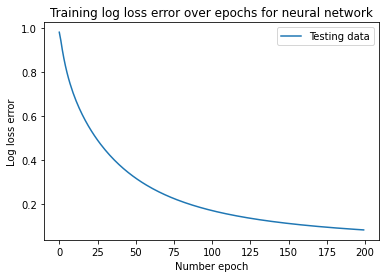

Three largest weights are 0.10395035683476783 0.10385544773418404 0.06547312225779876
Associated feature names are: household theirs withdraw
Weight associated with the word 'her': -0.00344992389833903
Weight associated with the word 'she': 0.00038682056033918544
Weight associated with the word 'his': -0.002713583984627103
Weight associated with the word 'he': -0.0005904098865973881
Weight associated with the word 'him': -0.00911686077309715
Weight associated with the word 'I': 0
Weight associated with the word 'kindness': -0.001827644242132254
Weight associated with the word 'home': 0
Weight associated with the word 'miss': 0.0035526903880495164
Weight associated with the word 'mr': 0.03239046053809903
Weight associated with the word 'family': 0
Weight associated with the word 'father': 0
Weight associated with the word 'mother': -0.015128090773122533
Weight associated with the word 'sister': 0.009342197486304568
Weight associated with the word 'brother': 0.012296838606189353


In [287]:
import matplotlib.pyplot as plt

(X, Y, array_of_feature_names) = old_return_embeddings()

n_epoch = 200
alpha = 0.0001

Y = Y.ravel()

w, costs = train(X, Y, n_epoch, alpha)

# plot costs over number of epochs

epochs_list = []

for j in range(n_epoch):
    epochs_list.append(j)

x1 = epochs_list
y1 = costs

plt.plot(x1, y1, label = "Testing data")
plt.xlabel("Number epoch")
plt.ylabel("Log loss error")
plt.title("Training log loss error over epochs for neural network")
plt.legend()
plt.show()

# iterate through the w list and find the 10 biggest weights and their corresponding feature names

w = w.tolist()
array_of_feature_names = array_of_feature_names.tolist()

w1 = 0
feature_name1 = ""
w2 = 0
feature_name2 = ""
w3 = 0
feature_name3 = ""

her_weight = 0
she_weight = 0
his_weight = 0
he_weight = 0
him_weight = 0
I_weight = 0
kindness_weight = 0
home_weight = 0
miss_weight = 0
mr_weight = 0
family_weight = 0
father_weight = 0
mother_weight = 0
sister_weight = 0
brother_weight = 0

for j in range(len(w) - 1):
    curr_w = w[j]
    curr_feature_name = array_of_feature_names[j]
    if (abs(curr_w) > w1 or abs(curr_w) > w2 or abs(curr_w) > w3):
        if (abs(curr_w) > w1):
            w1 = curr_w
            feature_name1 = curr_feature_name
            continue
        if (abs(curr_w) > w2):
            w2 = curr_w
            feature_name2 = curr_feature_name
            continue
        if (abs(curr_w) > w3):
            w3 = curr_w
            feature_name3 = curr_feature_name
    if (curr_feature_name == "her"):
        her_weight = curr_w
    if (curr_feature_name == "she"):
        she_weight = curr_w
    if (curr_feature_name == "his"):
        his_weight = curr_w
    if (curr_feature_name == "he"):
        he_weight = curr_w
    if (curr_feature_name == "him"):
        him_weight = curr_w
    if (curr_feature_name == "i"):
        I_weight = curr_w
    if (curr_feature_name == "kindness"):
        kindness_weight = curr_w
    if (curr_feature_name == "home"):
        home_weight = curr_w
    if (curr_feature_name == "miss"):
        miss_weight = curr_w
    if (curr_feature_name == "mr"):
        mr_weight = curr_w
    if (curr_feature_name == "family"):
        family_weight = curr_w
    if (curr_feature_name == "father"):
        father_weight = curr_w
    if (curr_feature_name == "mother"):
        mother_weight = curr_w
    if (curr_feature_name == "sister"):
        sister_weight = curr_w
    if (curr_feature_name == "brother"):
        brother_weight = curr_w

print("Three largest weights are", w1, w2, w3)
print("Associated feature names are:", feature_name1, feature_name2, feature_name3)
print("Weight associated with the word 'her':", her_weight)
print("Weight associated with the word 'she':", she_weight)
print("Weight associated with the word 'his':", his_weight)
print("Weight associated with the word 'he':", he_weight)
print("Weight associated with the word 'him':", him_weight)
print("Weight associated with the word 'I':", I_weight)
print("Weight associated with the word 'kindness':", kindness_weight)
print("Weight associated with the word 'home':", home_weight)
print("Weight associated with the word 'miss':", miss_weight)
print("Weight associated with the word 'mr':", mr_weight)
print("Weight associated with the word 'family':", family_weight)
print("Weight associated with the word 'father':", father_weight)
print("Weight associated with the word 'mother':", mother_weight)
print("Weight associated with the word 'sister':", sister_weight)
print("Weight associated with the word 'brother':", brother_weight)
            

# print(array_of_feature_names.tolist())
# print(w)

# can test using w * newX input matric, and rounding for the predictions

In [288]:
NUM_WOMEN_TEST = 20
NUM_MEN_TEST = 20
NUM_WOMEN_TRAIN = 25
NUM_MEN_TRAIN = 25

Training accuracy after epoch 0: 50.0000%
Training accuracy after epoch 100: 100.0000%
Training accuracy after epoch 200: 100.0000%
Training accuracy after epoch 300: 100.0000%
Training accuracy after epoch 400: 100.0000%
Training accuracy after epoch 499: 100.0000%
[0.99949476]
Predictions for F-TestingALadysLife.txt is: female
Mean squared error is 0.0
[0.07113599]
Predictions for F-TestingAnneOfGreenGables.txt is: male
Mean squared error is 0.5
[1.]
Predictions for F-TestingBelinda.txt is: female
Mean squared error is 0.3333333333333333
[0.99999988]
Predictions for F-TestingBondwoman.txt is: female
Mean squared error is 0.25
[1.]
Predictions for F-TestingCamilla.txt is: female
Mean squared error is 0.2
[0.99987265]
Predictions for F-TestingCurseCaste.txt is: female
Mean squared error is 0.16666666666666666
[0.93522985]
Predictions for F-TestingDalloway.txt is: female
Mean squared error is 0.14285714285714285
[0.99999194]
Predictions for F-TestingDanielDeronda.txt is: female
Mean squ

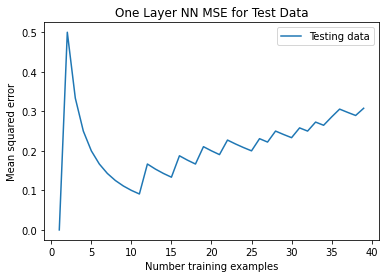

In [327]:
# INITIAL TESTING PROTOCOL

import matplotlib.pyplot as plt
    
array_of_text = []

list_of_author_files = ["F-AgeOfInnocence.txt", "F-AgnesGrey.txt", "F-ALittlePrincess.txt", "F-BlackBeauty.txt", "F-Cranford.txt", "F-Frankenstein.txt", "F-HouseOfMirth.txt", "F-JaneEyre.txt", "F-LadyAudleysSecret.txt", "F-MansfieldPark.txt", "F-Middlemarch.txt", "F-NorthAndSouth.txt", "F-NorthangerAbbey.txt", "F-Persuasion.txt", "F-PrideAndPrejudice.txt", "F-Sanditon.txt", "F-SenseAndSensibility.txt", "F-TheAwakening.txt", "F-TheMillOnTheFloss.txt", "F-ThePerpetualCurate.txt", "F-TheRomanceOfTheForest.txt", "F-Villette.txt", "F-WildfellHall.txt", "F-WivesAndDaughters.txt", "F-WutheringHeights.txt", 
    "M-AChristmasCarol.txt", "M-AnnaKarenina.txt", "M-AroundTheWorldIn80Days.txt", "M-AStudyInScarlet.txt", "M-CrimeAndPunishment.txt", "M-DavidCopperfield.txt", "M-DorianGray.txt", "M-Dracula.txt", "M-HeartOfDarkness.txt", "M-HuckFinn.txt", "M-LesMiserables.txt", "M-MadameBovary.txt", "M-MobyDick.txt", "M-TaleOfTwoCities.txt", "M-TessOfTheUbervilles.txt", "M-TheBrothersKaramazov.txt", "M-TheCountOfMonteCristo.txt", "M-TheInvisibleMan.txt", "M-TheRedBadgeOfCourage.txt", "M-TheWomanInWhite.txt", "M-ThroughTheLookingGlass.txt", "M-TreasureIsland.txt", "M-VanityFair.txt", "M-WarAndPeace.txt", "M-WizardOfOz.txt"]

for author_filename in list_of_author_files:
    with open (author_filename, 'r') as file:
        all_txt = file.read()
        array_of_text.append(all_txt)
    
list_of_testing_author_files = ['F-TestingALadysLife.txt', 'F-TestingAnneOfGreenGables.txt', 'F-TestingBelinda.txt', 'F-TestingBondwoman.txt', 'F-TestingCamilla.txt', 'F-TestingCurseCaste.txt', 'F-TestingDalloway.txt', 'F-TestingDanielDeronda.txt', 'F-TestingEmma.txt', 'F-TestingIncidents.txt', 'F-TestingIola.txt', 'F-TestingLighthouse.txt', 'F-TestingMaryBarton.txt', 'F-TestingOurNig.txt', 'F-TestingSecretGarden.txt', 'F-TestingSilasMarner.txt', 'F-TestingTheCustomOfTheCountry.txt', 'F-TestingUncleTom.txt', 'F-TestingYellowWallpaper.txt',
                                'M-TestingAlice.txt', 'M-TestingBarchesterTowers.txt', 'M-TestingBleakHouse.txt', 'M-TestingCallOfTheWild.txt', 'M-TestingDaisyMiller.txt', 'M-TestingDeadSouls.txt', 'M-TestingElectiveAffinities.txt', 'M-TestingFarFromTheMadding.txt', 'M-TestingGreatExpectations.txt', 'M-TestingHunchback.txt', 'M-TestingJekhylHyde.txt', 'M-TestingJourneyToTheCenter.txt', 'M-TestingLordJim.txt', 'M-TestingMohicans.txt', 'M-TestingOliverTwist.txt', 'M-TestingPortraitOfALady.txt', 'M-TestingScarletLetter.txt', 'M-TestingTellTaleHeart.txt', 'M-TestingTheIdiot.txt', 'M-TestingTheJungle.txt']
    
array_of_testing_text = []
    
for testing_author_filename in list_of_testing_author_files:
    with open (testing_author_filename, 'r') as file:
        new_text = file.read()
        array_of_testing_text.append(new_text)
            

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(array_of_text)

new_embedding = []

(X, Y, array_of_feature_names) = old_return_embeddings()

n_epoch = 500
alpha = 0.01

Y = Y.ravel()

w, costs = train(X, Y, n_epoch, alpha) # train model

true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

predictions_women = 0
predictions_men = 0

mean_squared_error = 0
mean_squared_errors = []
m_values = []

for j in range(len(array_of_testing_text)):
    new_document = array_of_testing_text[j]
    new_embedding = count_vect.transform([new_document]).toarray()
    
# protocol to make prediction

    X_withbias = np.hstack([np.ones((new_embedding.shape[0],1)), new_embedding])  # fix x_0 = 1

    predictions = forward(X_withbias, w)
    
    if (predictions.round() == 1):
        print(predictions)
        print("Predictions for", list_of_testing_author_files[j], "is: female")
        if (j < NUM_WOMEN_TEST): # we're actually looking at a woman
            true_positives += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
        else:
            false_positives += 1
            mean_squared_error += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
    
    else:
        print(predictions)
        print("Predictions for", list_of_testing_author_files[j], "is: male")
        if (j < NUM_WOMEN_TEST):
            false_negatives += 1
            mean_squared_error += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
        else:
            true_negatives += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
        
# error metrics

accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
recall = (true_positives) / (true_positives + false_negatives)
precision = (true_positives) / (true_positives + false_positives)
        
print("True positives is", true_positives, "/", NUM_WOMEN_TEST)
print("False positives is", false_positives, "/", NUM_MEN_TEST)
print("True negatives is", true_negatives, "/", NUM_MEN_TEST)
print("False negatives is", false_negatives, "/", NUM_WOMEN_TEST)
# print("Mean squared error is", mean_squared_error / (NUM_WOMEN_TEST + NUM_MEN_TEST))
print("Accuracy for testing data is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

################################################################################

# plotting protocol

x1 = m_values
y1 = mean_squared_errors
plt.plot(x1, y1, label = "Testing data")
plt.xlabel("Number training examples")
plt.ylabel("Mean squared error")
plt.title("One Layer NN MSE for Test Data")
plt.legend()
plt.show()




# Possible Ways to Handle Situations of Overfitting

A) Get more training examples

B) Try using a smaller set of features

C) Try regularizing the cost function

D) Try using a smaller number of epochs


Training accuracy after epoch 0: 50.0000%
Training accuracy after epoch 10: 68.0000%
Training accuracy after epoch 20: 58.0000%
Training accuracy after epoch 29: 74.0000%
[0.99690451]
Predictions for TestingEmma.txt is: female
Mean squared error is 0.0
[3.79553144e-10]
Predictions for TestingUncleTom.txt is: male
Mean squared error is 0.5
[0.00064851]
Predictions for TestingYellowWallpaper.txt is: male
Mean squared error is 0.6666666666666666
[3.91054957e-13]
Predictions for TestingAnneOfGreenGables.txt is: male
Mean squared error is 0.75
[0.99683636]
Predictions for TestingSecretGarden.txt is: female
Mean squared error is 0.6
[0.02399889]
Predictions for TestingGreatExpectations.txt is: male
Mean squared error is 0.5
[7.21362149e-12]
Predictions for TestingPortraitOfALady.txt is: male
Mean squared error is 0.42857142857142855
[3.10376284e-14]
Predictions for TestingAlice.txt is: male
Mean squared error is 0.375
[4.37778123e-12]
Predictions for TestingScarletLetter.txt is: male
Mean sq

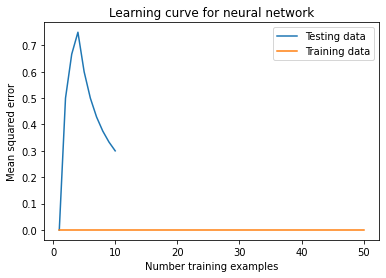

In [106]:
# INITIAL ATTEMPT TO MITIGATE OVERFITTING: EPOCHS

import matplotlib.pyplot as plt
    
array_of_text = []

list_of_author_files = ["WildfellHall.txt", "PrideAndPrejudice.txt", "JaneEyre.txt", "LittleWomen.txt", "Middlemarch.txt", "WutheringHeights.txt", "NorthAndSouth.txt", "Frankenstein.txt", "Persuasion.txt", "MansfieldPark.txt", "NorthangerAbbey.txt", "SenseAndSensibility.txt", "Sanditon.txt", "TheAwakening.txt", "Villette.txt", "WivesAndDaughters.txt", "AgnesGrey.txt", "Cranford.txt", "TheMillOnTheFloss.txt", "ALittlePrincess.txt", "HouseOfMirth.txt", "AgeOfInnocence.txt", "ThePerpetualCurate.txt", "BlackBeauty.txt", "LadyAudleysSecret.txt", 
    "HeartOfDarkness.txt", "TaleOfTwoCities.txt", "CrimeAndPunishment.txt", "MadameBovary.txt", "TessOfTheUbervilles.txt", "MobyDick.txt", "Dracula.txt", "DorianGray.txt", "WarAndPeace.txt", "HuckFinn.txt", "DavidCopperfield.txt", "TheCountOfMonteCristo.txt", "LesMiserables.txt", "AnnaKarenina.txt", "AChristmasCarol.txt", "TheBrothersKaramazov.txt", "AStudyInScarlet.txt", "AroundTheWorldIn80Days.txt", "TreasureIsland.txt", "WizardOfOz.txt", "TheInvisibleMan.txt", "TheRedBadgeOfCourage.txt", "TheWomanInWhite.txt", "VanityFair.txt", "ThroughTheLookingGlass.txt"]

for author_filename in list_of_author_files:
    with open (author_filename, 'r') as file:
        all_txt = file.read()
        array_of_text.append(all_txt)
    
list_of_testing_author_files = ['TestingEmma.txt', 'TestingUncleTom.txt', 'TestingYellowWallpaper.txt', 'TestingAnneOfGreenGables.txt', 'TestingSecretGarden.txt', 'TestingGreatExpectations.txt', 'TestingPortraitOfALady.txt', 'TestingAlice.txt', 'TestingScarletLetter.txt', 'TestingJekhylHyde.txt']
# list_of_testing_author_files = ['TestingAusten.txt', 'TestingHarrietBeecherStowe.txt', 'TestingPerkinsGilman.txt', 'TestingAnneOfGreenGables.txt', 'TestingSecretGarden.txt', 'TestingDickens.txt', 'TestingJames.txt', 'TestingCarroll.txt', 'TestingTwain.txt', 'TestingTolstoy.txt', 'TestingDavidCopperfield.txt', 'TestingHawthorne.txt', 'TestingTellTaleHeart.txt', 'TestingJekhylHyde.txt']
    
array_of_testing_text = []
    
for testing_author_filename in list_of_testing_author_files:
    with open (testing_author_filename, 'r') as file:
        new_text = file.read()
        array_of_testing_text.append(new_text)
            

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(array_of_text)

new_embedding = []

(X, Y, array_of_feature_names) = return_embeddings()

n_epoch = 30
alpha = 0.01

Y = Y.ravel()

w, costs = train(X, Y, n_epoch, alpha) # train model

true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

predictions_women = 0
predictions_men = 0

mean_squared_error = 0
mean_squared_errors = []
m_values = []

for j in range(len(array_of_testing_text)):
    new_document = array_of_testing_text[j]
    new_embedding = count_vect.transform([new_document]).toarray()
    
# protocol to make prediction

    X_withbias = np.hstack([np.ones((new_embedding.shape[0],1)), new_embedding])  # fix x_0 = 1

    predictions = forward(X_withbias, w)
    
    if (predictions.round() == 1):
        print(predictions)
        print("Predictions for", list_of_testing_author_files[j], "is: female")
        if (j < NUM_WOMEN_TEST): # we're actually looking at a woman
            true_positives += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
        else:
            false_positives += 1
            mean_squared_error += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
    
    else:
        print(predictions)
        print("Predictions for", list_of_testing_author_files[j], "is: male")
        if (j < NUM_WOMEN_TEST):
            false_negatives += 1
            mean_squared_error += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
        else:
            true_negatives += 1
            print("Mean squared error is", (mean_squared_error / (j + 1)))
            mean_squared_errors.append((mean_squared_error / (j + 1)))
            m_values.append((j+1))
        
# error metrics

accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
# recall = (true_positives) / (true_positives + false_negatives)
# precision = (true_positives) / (true_positives + false_positives)
        
print("Accuracy for testing data is", accuracy)
# print("Recall is", recall)
# print("Precision is", precision)

################################################################################

# repeat error protocol for testing data

true_positives_train = 0
false_positives_train = 0
true_negatives_train = 0
false_negatives_train = 0

mean_squared_error_train = 0
mean_squared_errors_train = []
m_values_train = []

for j in range(len(array_of_text)):
    new_document = array_of_text[j]
    new_embedding = count_vect.transform([new_document]).toarray()
    
# protocol to make prediction

    X_withbias = np.hstack([np.ones((new_embedding.shape[0],1)), new_embedding])  # fix x_0 = 1

    predictions = forward(X_withbias, w)
    
    if (predictions.round() == 1):
        if (j < NUM_WOMEN_TRAIN): # we're actually looking at a woman
            true_positives += 1
            mean_squared_errors_train.append((mean_squared_error_train / (j + 1)))
            m_values_train.append((j+1))
        else:
            false_positives += 1
            mean_squared_error += 1
            mean_squared_errors_train.append((mean_squared_error_train / (j + 1)))
            m_values_train.append((j+1))
    
    else:
        if (j < NUM_WOMEN_TRAIN):
            false_negatives += 1
            mean_squared_error += 1
            mean_squared_errors_train.append((mean_squared_error_train / (j + 1)))
            m_values_train.append((j+1))
        else:
            true_negatives += 1
            mean_squared_errors_train.append((mean_squared_error_train / (j + 1)))
            m_values_train.append((j+1))

# plotting protocol

x1 = m_values
y1 = mean_squared_errors
x2 = m_values_train
y2 = mean_squared_errors_train

plt.plot(x1, y1, label = "Testing data")
plt.plot(x2, y2, label = "Training data")
plt.xlabel("Number training examples")
plt.ylabel("Mean squared error")
plt.title("Learning curve for neural network")
plt.legend()
plt.show()

In [ ]:
# Trying to regularize the cost function

